# Pyplot project for fundamentals of data analysis

***

At the start of this project, I will just be writing some general notes and ideas that I might have. Later on, I will edit down these ideas and put together the completed notebook.

[Gallery of Matplotlib examples](https://matplotlib.org/stable/gallery/index.html)

### What I consider a 'good' graph:
- Shows a lot of data easily and effectively
- I find that I tend to like combined graphs that have multiple ways of showing data e.g. size, colour, position

---

For all of these graphs, numpy and matplot lib will need to be imported

In [1]:
import numpy as np
import matplotlib.pyplot as plt

***
## Scatter Plot with Histograms
This plot combines a scatter graph with histograms on the top and side of the graph

https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html#sphx-glr-gallery-lines-bars-and-markers-scatter-hist-py

In [2]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# some random data
x = np.random.randn(1000)
y = np.random.randn(1000)


def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

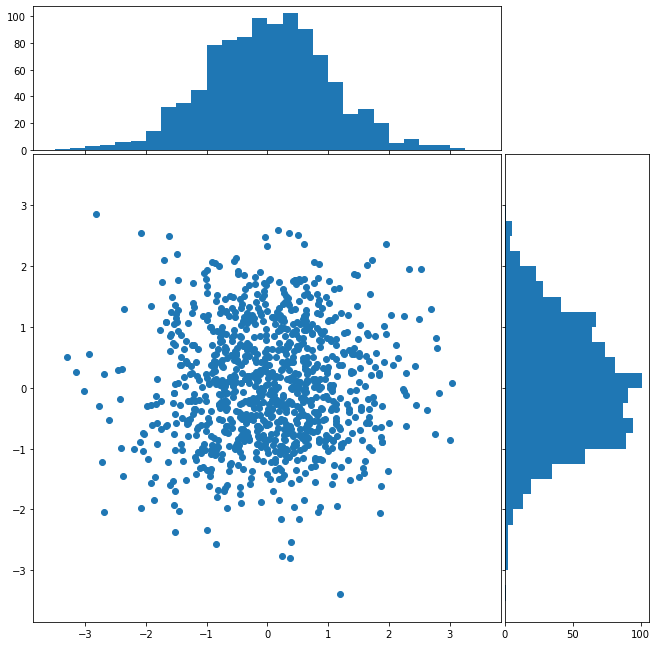

In [30]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(10, 10))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.show()

***
## Stackplot

This plot gives a good indication of proportion over time as well a good indication of total cumulative data over time.

https://matplotlib.org/stable/gallery/lines_bars_and_markers/stackplot_demo.html#sphx-glr-gallery-lines-bars-and-markers-stackplot-demo-py

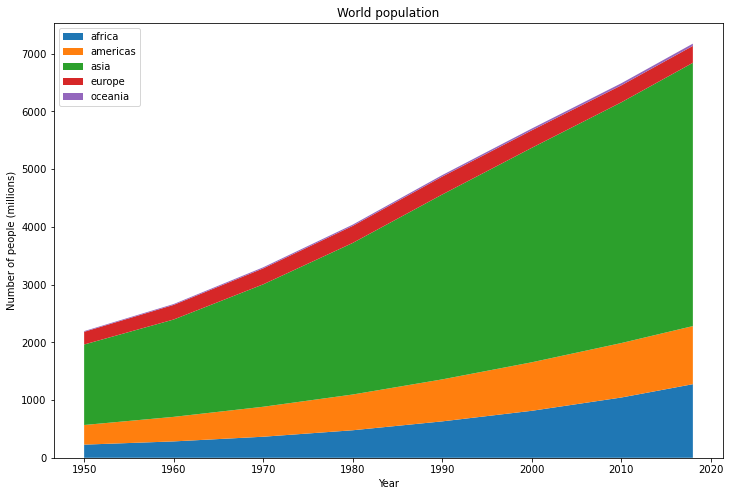

In [28]:
# data from United Nations World Population Prospects (Revision 2019)
# https://population.un.org/wpp/, license: CC BY 3.0 IGO
year = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2018]
population_by_continent = {
    'africa': [228, 284, 365, 477, 631, 814, 1044, 1275],
    'americas': [340, 425, 519, 619, 727, 840, 943, 1006],
    'asia': [1394, 1686, 2120, 2625, 3202, 3714, 4169, 4560],
    'europe': [220, 253, 276, 295, 310, 303, 294, 293],
    'oceania': [12, 15, 19, 22, 26, 31, 36, 39],
}

fig, ax = plt.subplots(figsize = (12,8))
ax.stackplot(year, population_by_continent.values(),
             labels=population_by_continent.keys())
ax.legend(loc='upper left')
ax.set_title('World population')
ax.set_xlabel('Year')
ax.set_ylabel('Number of people (millions)')

plt.show()

***
## Boxplot
This plot, often used in research, shows various statistical properties of a dataset

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html

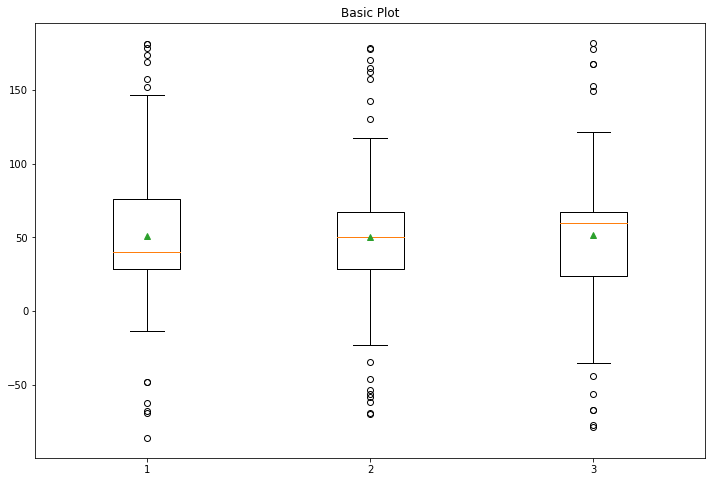

In [48]:

spread = np.random.rand(60) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d1 = np.concatenate((spread, center, flier_high, flier_low))

spread2 = np.random.rand(50) * 100
center2 = np.ones(25) * 50
flier_high2 = np.random.rand(10) * 100 + 100
flier_low2 = np.random.rand(10) * -100
d2 = np.concatenate((spread2, center2, flier_high2, flier_low2))

spread3 = np.random.rand(40) * 100
center3 = np.ones(25) * 60
flier_high3 = np.random.rand(10) * 100 + 100
flier_low3 = np.random.rand(10) * -100
d3 = np.concatenate((spread3, center3, flier_high3, flier_low3))

data = [d1, d2, d3]

fig, ax = plt.subplots(figsize = (12,8))
ax.set_title('Basic Plot')
ax.boxplot(data, showmeans = True)

plt.show()

***

## End